<a href="https://colab.research.google.com/github/alimomennasab/ASL-Translator/blob/main/CS4200_ASL_Alphabet_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

base_path = "/content/drive/MyDrive/ASL_Hands/asl_alphabet_train/asl_alphabet_train"

print("Folder exists:", os.path.exists(base_path))
print("Subfolders:", os.listdir(base_path))


Folder exists: True
Subfolders: ['Z', 'X', 'Y', 'V', 'T', 'U', 'S', 'space', 'W', 'R', 'Q', 'O', 'P', 'L', 'nothing', 'K', 'M', 'N', 'J', 'I', 'H', 'E', 'F', 'G', 'D', 'del', 'A', 'B', 'C']


In [ ]:
import os

base = "/content/drive/MyDrive/ASL_Hands"
asl_small_path = os.path.join(base, "asl_small", "asl_alphabet_train")
os.makedirs(asl_small_path, exist_ok=True)

print("Created folder:", asl_small_path)
print("Exists:", os.path.exists(asl_small_path))


Created folder: /content/drive/MyDrive/ASL_Hands/asl_small/asl_alphabet_train
Exists: True


In [ ]:
import os
import shutil

source = "/content/drive/MyDrive/ASL_Hands/asl_alphabet_train/asl_alphabet_train"
dest   = "/content/drive/MyDrive/ASL_Hands/asl_small/asl_alphabet_train"

os.makedirs(dest, exist_ok=True)
for cls in sorted(os.listdir(source)):
    src_cls = os.path.join(source, cls)
    dst_cls = os.path.join(dest, cls)
    os.makedirs(dst_cls, exist_ok=True)

    images = [f for f in os.listdir(src_cls) if f.lower().endswith(".jpg")]

    images.sort()
    selected = images[:1000]

    print(f"Copying {len(selected)} images from {cls}...")

    # Copy images
    for img in selected:
        src_filepath = os.path.join(src_cls, img)
        dst_filepath = os.path.join(dst_cls, img)

        if os.path.exists(src_filepath):
            shutil.copy(
                src_filepath,
                dst_filepath
            )
        else:
            print(f"Warning: Source file not found, skipping {src_filepath}")

print("Created 1000-image subset in asl_small/")

Copying 1000 images from A...
Copying 1000 images from B...
Copying 1000 images from C...
Copying 1000 images from D...
Copying 1000 images from E...
Copying 1000 images from F...
Copying 1000 images from G...
Copying 1000 images from H...
Copying 1000 images from I...
Copying 1000 images from J...
Copying 1000 images from K...
Copying 1000 images from L...
Copying 1000 images from M...
Copying 1000 images from N...
Copying 1000 images from O...
Copying 1000 images from P...
Copying 1000 images from Q...
Copying 1000 images from R...
Copying 1000 images from S...
Copying 1000 images from T...
Copying 1000 images from U...
Copying 1000 images from V...
Copying 1000 images from W...
Copying 1000 images from X...
Copying 1000 images from Y...
Copying 1000 images from Z...
Copying 1000 images from del...
Copying 1000 images from nothing...
Copying 1000 images from space...
Created 1000-image subset in asl_small/


In [ ]:
train_dir = "/content/drive/MyDrive/ASL_Hands/asl_small/asl_alphabet_train"

import os
print("Classes found:", os.listdir(train_dir))
print("Total classes:", len(os.listdir(train_dir)))


Classes found: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

# save label map for webcam prediction later
label_map = {v: k for k, v in train_gen.class_indices.items()}
label_map


Found 20800 images belonging to 26 classes.
Found 5200 images belonging to 26 classes.


{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,279,834 (4.88 MB)

 Trainable params: 1,279,834 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=7
)

model.save("asl_cnn_model_small_Big3.h5")


Epoch 1/7
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.2873 - loss: 2.3690

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


650/650 ━━━━━━━━━━━━━━━━━━━━ 328s 501ms/step - accuracy: 0.2877 - loss: 2.3677 - val_accuracy: 0.6056 - val_loss: 1.3601
Epoch 2/7
650/650 ━━━━━━━━━━━━━━━━━━━━ 320s 492ms/step - accuracy: 0.8920 - loss: 0.3341 - val_accuracy: 0.6962 - val_loss: 1.1442
Epoch 3/7
650/650 ━━━━━━━━━━━━━━━━━━━━ 319s 491ms/step - accuracy: 0.9602 - loss: 0.1204 - val_accuracy: 0.7200 - val_loss: 1.2442
Epoch 4/7
650/650 ━━━━━━━━━━━━━━━━━━━━ 313s 482ms/step - accuracy: 0.9750 - loss: 0.0743 - val_accuracy: 0.6581 - val_loss: 1.7755
Epoch 5/7
650/650 ━━━━━━━━━━━━━━━━━━━━ 329s 506ms/step - accuracy: 0.9793 - loss: 0.0643 - val_accuracy: 0.7440 - val_loss: 1.2914
Epoch 6/7
650/650 ━━━━━━━━━━━━━━━━━━━━ 363s 476ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.7508 - val_loss: 1.4809
Epoch 7/7
650/650 ━━━━━━━━━━━━━━━━━━━━ 316s 486ms/step - accuracy: 0.9872 - loss: 0.0431 - val_accuracy: 0.7513 - val_loss: 1.4223


In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model # Import load_model

drive.mount('/content/drive')

# Load the model before saving it to drive
model = load_model('asl_cnn_model_small_Big3.h5')

model.save("/content/drive/MyDrive/asl_cnn_model_small_Big3.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("asl_cnn_model_small_Big3.h5")
uploaded = files.upload()

for filename in uploaded.keys():
    print("Testing:", filename)

    img = cv2.imread(filename)

    if img is None:
        print("Error: Could not read image")
        continue

    img_resized = cv2.resize(img, (64, 64))
    img_norm = img_resized.astype("float32") / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    pred = model.predict(img_input, verbose=0)[0]
    idx = np.argmax(pred)
    letter = label_map[idx]

    print("Prediction:", letter)


Saving C_test.jpg to C_test (1).jpg
Testing: C_test (1).jpg


Prediction: C


In [ ]:
!pip install mediapipe

In [ ]:
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2

def get_webcam_frame():
    js = """
    (() => {
        const video = document.getElementById('aslWebcam');
        if (!video) return null;

        let canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;

        let ctx = canvas.getContext('2d');
        ctx.drawImage(video, 0, 0);

        return canvas.toDataURL('image/jpeg', 0.8);
    })();
    """

    data = eval_js(js)
    if data is None:
        return None

    header, encoded = data.split(",", 1)
    decoded = b64decode(encoded)
    arr = np.frombuffer(decoded, dtype=np.uint8)
    frame = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return frame

In [ ]:
!pip install mediapipe --quiet

In [ ]:
import mediapipe as mp
from tensorflow.keras.models import load_model

model = load_model("asl_cnn_model_small.h5")

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.6,
    min_tracking_confidence=0.5
)

In [ ]:
sentence_buffer = []

def update_sentence(letter):
    global sentence_buffer

    if letter == "del":
        if sentence_buffer:
            sentence_buffer.pop()

    elif letter == "space":
        sentence_buffer.append(" ")

    elif letter == "nothing":
        return  # ignore "nothing"

    else:
        sentence_buffer.append(letter)

    print("Sentence:", "".join(sentence_buffer))

In [ ]:

#  ASL INTERPRETER

from IPython.display import HTML, display
import cv2
import numpy as np
import time
from google.colab.output import eval_js
from base64 import b64decode
import mediapipe as mp
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


# Show webcam inside this cell
display(HTML('''
<div style="text-align:center;">
  <video id="aslWebcam" width="480" height="360" autoplay playsinline
         style="border:4px solid #00FF00;">
  </video>
</div>

<script>
async function initWebcam() {
    const video = document.getElementById("aslWebcam");
    try {
        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        console.log("Webcam active");
    } catch (err) {
        alert("Camera blocked — enable webcam permissions.");
        console.error(err);
    }
}
initWebcam();
</script>
'''))


# Load model
model = load_model("asl_cnn_model_small_Big3.h5")
print("Model loaded")



train_dir = "/content/drive/MyDrive/ASL_Hands/asl_small/asl_alphabet_train"
img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

label_map = {v: k for k, v in train_gen.class_indices.items()}
print("Label map loaded:", label_map)


# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.6,
    min_tracking_confidence=0.5
)


# frame capture
def get_frame():
    js = """
    (() => {
        const video = document.getElementById('aslWebcam');
        if (!video) return "NO_VIDEO";
        if (video.videoWidth === 0 || video.videoHeight === 0) return "NO_FRAME";

        let canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;

        let ctx = canvas.getContext('2d');
        ctx.drawImage(video, 0, 0);

        return canvas.toDataURL('image/jpeg', 0.8);
    })();
    """

    data = eval_js(js)

    if data in ["NO_VIDEO", "NO_FRAME"]:
        return None

    try:
        header, encoded = data.split(",", 1)
    except:
        return None

    decoded = b64decode(encoded)
    if len(decoded) == 0:
        return None

    arr = np.frombuffer(decoded, dtype=np.uint8)
    frame = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return frame


# Interpreter loop
sentence = []
CONFIDENCE_THRESHOLD = 0.70

print("\n ASL Interpreter Started\n")

try:
    while True:
        frame = get_frame()
        if frame is None:
            print("Waiting for webcam...")
            time.sleep(0.5)
            continue

        # Hand detection
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(rgb)

        if not results.multi_hand_landmarks:
            print("No hand detected")
            time.sleep(1.5)
            continue


        # CROP HAND using MediaPipe landmarks

        h, w, _ = frame.shape
        hand = results.multi_hand_landmarks[0]

        x_coords = [lm.x for lm in hand.landmark]
        y_coords = [lm.y for lm in hand.landmark]

        xmin = int(min(x_coords) * w) - 20
        xmax = int(max(x_coords) * w) + 20
        ymin = int(min(y_coords) * h) - 20
        ymax = int(max(y_coords) * h) + 20

        xmin = max(0, xmin)
        ymin = max(0, ymin)
        xmax = min(w, xmax)
        ymax = min(h, ymax)

        hand_crop = frame[ymin:ymax, xmin:xmax]

        if hand_crop.size == 0:
            print("Bad crop — skipping")
            time.sleep(1.5)
            continue


        # Prepare image for model

        img = cv2.resize(hand_crop, (64, 64))
        img = img.astype("float32") / 255.0
        img = np.expand_dims(img, axis=0)

        pred = model.predict(img, verbose=0)[0]
        idx = np.argmax(pred)
        confidence = pred[idx]
        letter = label_map[idx]


        # Apply confidence threshold

        if confidence < CONFIDENCE_THRESHOLD:
            print(f"Low confidence ({confidence:.2f}) — skipping")
            time.sleep(1.5)
            continue


        # Update sentence buffer

        if letter == "del":
            if sentence:
                sentence.pop()
        elif letter == "space":
            sentence.append(" ")
        elif letter != "nothing":
            sentence.append(letter)

        print(f"Predicted: {letter} ({confidence:.2f})")
        print("Sentence:", "".join(sentence))
        print("------")

        time.sleep(1.5)

except KeyboardInterrupt:
    print("Interpreter stopped.")


Model loaded
Found 20800 images belonging to 26 classes.
Label map loaded: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

 ASL Interpreter Started

Predicted: Y (0.71)
Sentence: Y
------
No hand detected
No hand detected
Low confidence (0.48) — skipping
No hand detected
Low confidence (0.23) — skipping
No hand detected
No hand detected
No hand detected
No hand detected
No hand detected
No hand detected
Low confidence (0.68) — skipping
No hand detected
Predicted: C (1.00)
Sentence: YC
------
No hand detected
No hand detected
No hand detected
No hand detected
Low confidence (0.46) — skipping
No hand detected
No hand detected
No hand detected
No hand detected
No hand detected
Low confidence (0.52) — skipping
No hand detected
No hand detected
No hand detected
No hand detected
No hand detected
Low confidence (0.64)

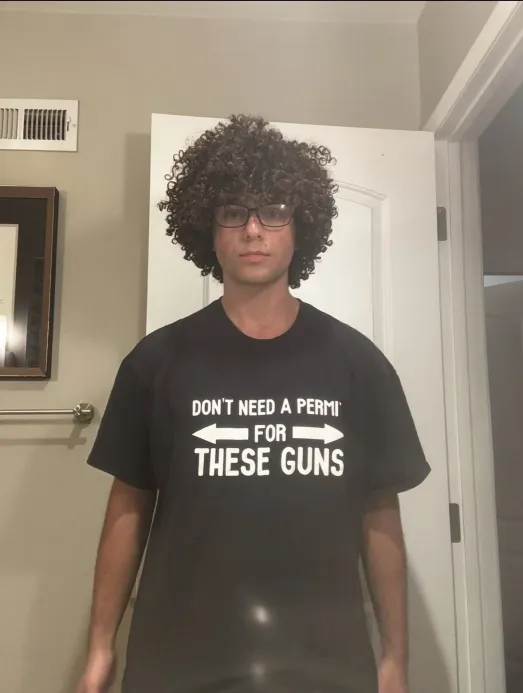

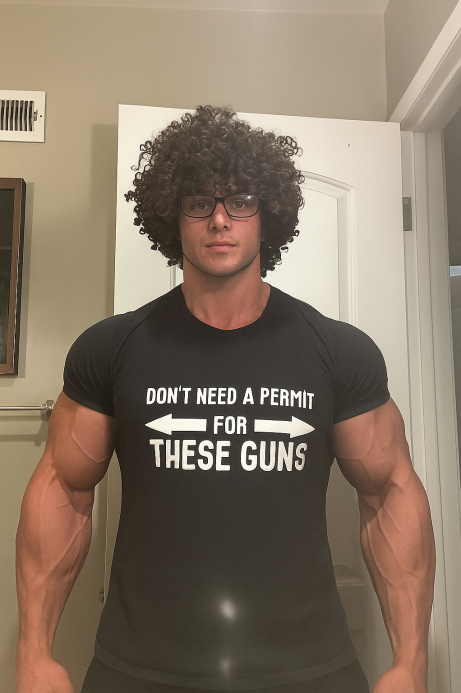